In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv("climate_action_data.csv")
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [4]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [5]:
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

In [6]:
df['Date'] = df['Date'].fillna(method='ffill')

C:\Users\Katex\AppData\Local\Temp\ipykernel_22372\1291857192.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [7]:
print(df['Date'].head())
print(df['Date'].dtype)

0    2025-01-01
1    2025-01-02
2    2025-01-03
3    2025-01-04
4    2025-01-05
Name: Date, dtype: object
object


In [8]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [9]:
(df == 'error').any()
(df == 'error').sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [10]:
print(df.duplicated())
print(df[df.duplicated()])

0      False
1      False
2      False
3      False
4      False
       ...  
908     True
909     True
910     True
911     True
912     True
Length: 913, dtype: bool
    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
800  SEN-1008  2025-01-09            52.08    6.08           22.0        89.3   
802  SEN-1175  2025-06-25            22.21    5.42           23.4        68.4   
803  SEN-1735  2027-01-06             71.4    4.93           24.5        67.0   
804  SEN-1242  2025-08-31            74.04    5.62           25.5        76.9   
805  SEN-1764  2027-02-04            12.35    7.38           27.8        33.4   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12

In [12]:
df = df.drop_duplicates()

In [13]:
df.replace('error', np.nan, inplace=True)

In [14]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [16]:
float_columns = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

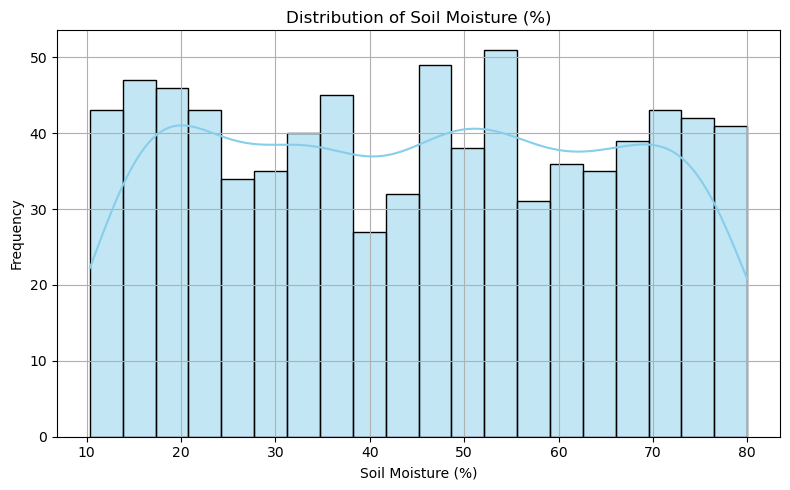

In [17]:
# histogram for soil moisture

plt.figure(figsize=(8, 5))
sns.histplot(df['Soil_Moisture(%)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Soil Moisture (%)')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

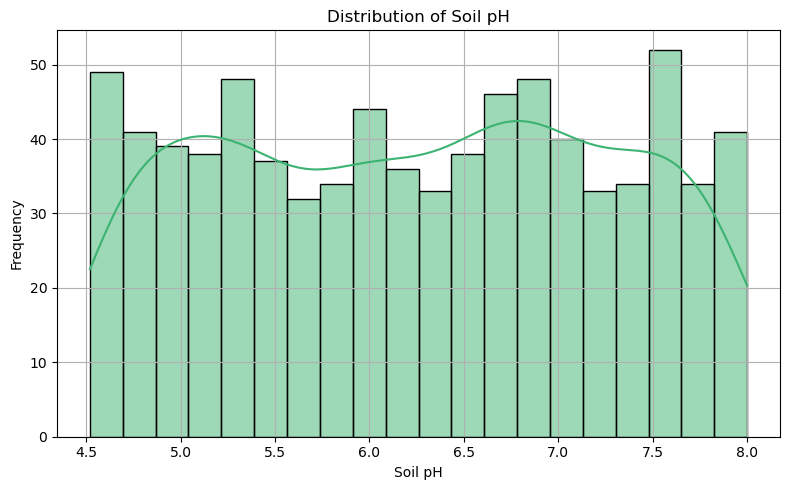

In [18]:
# Soil_Ph Histogram

plt.figure(figsize=(8, 5))
sns.histplot(df['Soil_pH'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Soil pH')
plt.xlabel('Soil pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

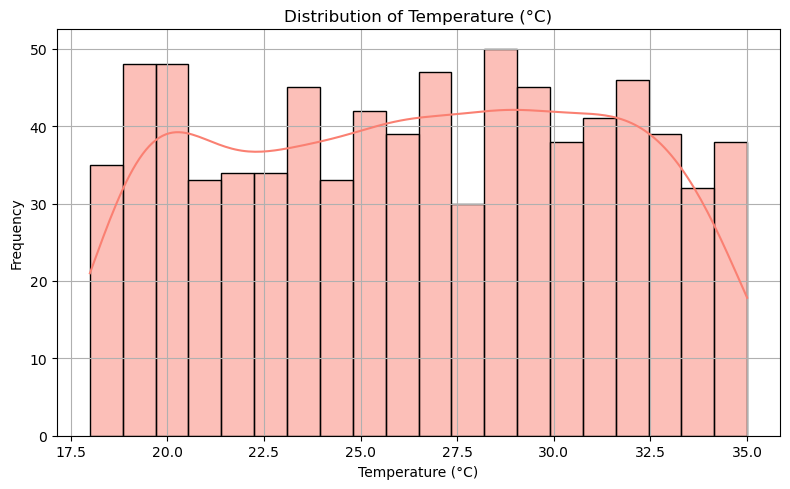

In [19]:
# histogram for temperature

plt.figure(figsize=(8, 5))
sns.histplot(df['Temperature(C)'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

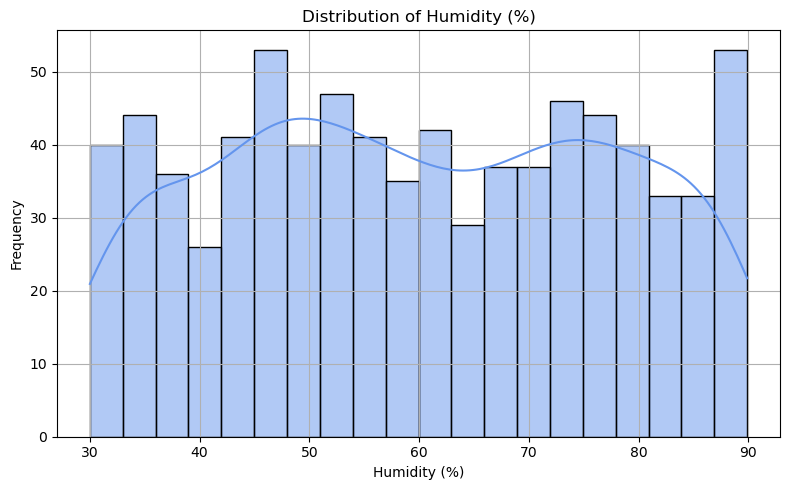

In [20]:
# histogram for humidity

plt.figure(figsize=(8, 5))
sns.histplot(df['Humidity(%)'], bins=20, kde=True, color='cornflowerblue')
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

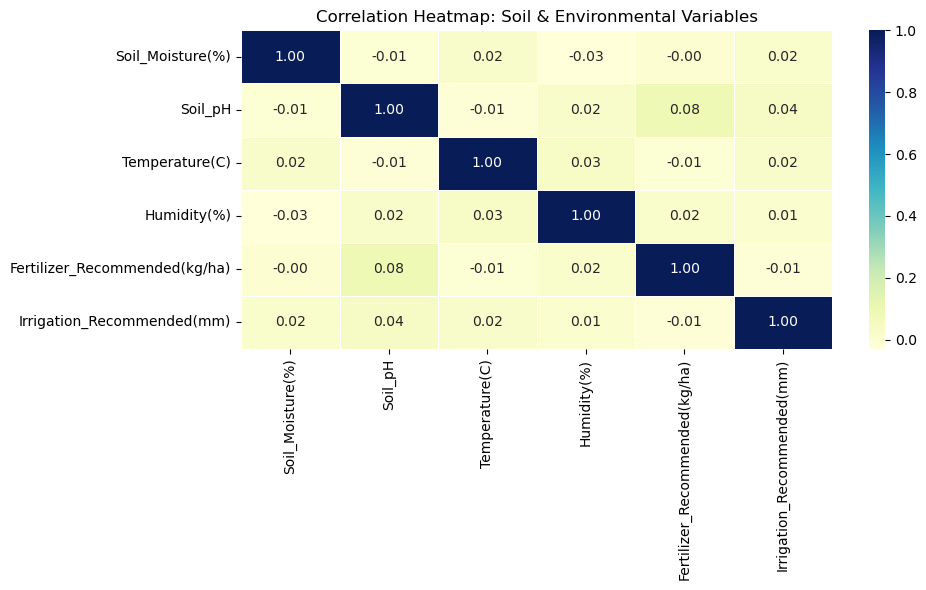

In [21]:
# corelation heat map

plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Soil & Environmental Variables')
plt.tight_layout()
plt.show()

In [22]:
# Get variables that influence Fertilizer_Recommended
fert_corr = corr['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)').sort_values(ascending=False)

print("Correlation with Fertilizer_Recommended(kg/ha):")
print(fert_corr)

Correlation with Fertilizer_Recommended(kg/ha):
Soil_pH                       0.083676
Humidity(%)                   0.015300
Soil_Moisture(%)             -0.002757
Temperature(C)               -0.007206
Irrigation_Recommended(mm)   -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


Average Soil Moisture (%) by Crop Type:
Crop_Type
Wheat       47.368857
Maize       44.952078
Beans       44.389139
Tomatoes    43.809760
Lettuce     42.970200
Name: Soil_Moisture(%), dtype: float64


C:\Users\Katex\AppData\Local\Temp\ipykernel_22372\2386397319.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_moisture_per_crop.values, y=avg_moisture_per_crop.index, palette='Blues_r')


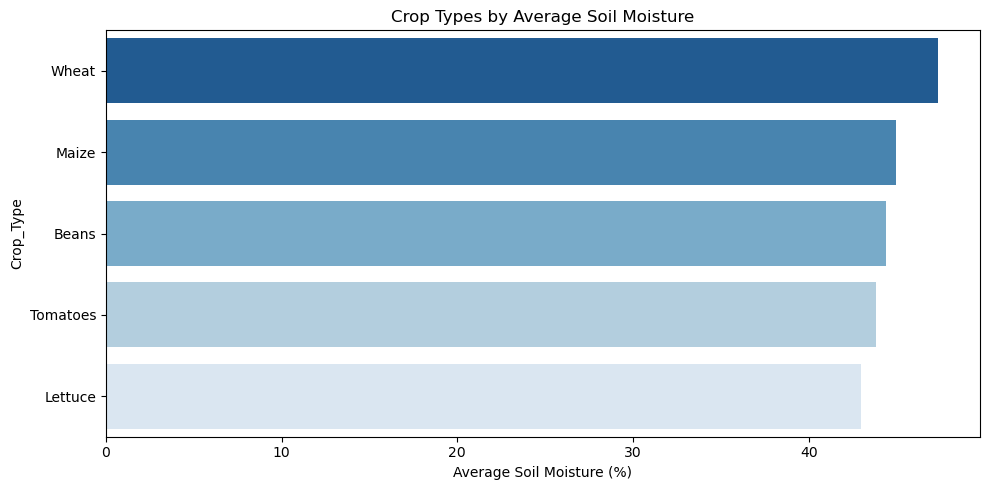

In [23]:
# determining crop with highest moisture

avg_moisture_per_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

print("Average Soil Moisture (%) by Crop Type:")
print(avg_moisture_per_crop)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_moisture_per_crop.values, y=avg_moisture_per_crop.index, palette='Blues_r')
plt.xlabel('Average Soil Moisture (%)')
plt.title('Crop Types by Average Soil Moisture')
plt.tight_layout()
plt.show()

In [24]:
#irrigation adjustments

# Filter crops with average temperature > 30°C

high_temp_crops = df.groupby('Crop_Type').agg({
    'Temperature(C)': 'mean',
    'Irrigation_Recommended(mm)': 'mean'
})

high_temp_crops_filtered = high_temp_crops[high_temp_crops['Temperature(C)'] > 30]

print("Crops with Avg Temp > 30°C and their Avg Irrigation Recommendations:")
print(high_temp_crops_filtered)

Crops with Avg Temp > 30°C and their Avg Irrigation Recommendations:
Empty DataFrame
Columns: [Temperature(C), Irrigation_Recommended(mm)]
Index: []


In [25]:
# saving cleaned datset

df.to_csv('cleaned_precision_agriculture_data.csv', index=False)